# **Nick Newman - Homework 1, Problem 6**

In [1]:
# Creating a Logistic Regression model from scratch and fitting
# it on the reg-lr-data dataset

# reading in the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from textwrap import wrap
data = pd.read_csv("reg-lr-data.csv")

In [2]:
# splitting the data into the X values and y values as numpy arrays
X = data.iloc[:,:3].values
y = data['y'].values

**Defining the Logistic Regression Model using Gradient Descent**

In [3]:
class Logistic_Regression_L2:
    """ Defining a Logistic Regression class with L2 regularization
    
    The parameters are:
        l2: lambda value for l2 regularization
        n_iter: number of iterations over the dataset
        eta: learning rate/step value
    """
    
    def __init__(self, l2=0.0, n_iter=1000, eta=0.05):
        self.l2 = l2
        self.n_iter = n_iter
        self.eta = eta
            
    def sigmoid(self, z):
        # This is the sigmoid function of z
        return 1/(1+ np.exp(-z))
    
    def fit(self, X, y):
        # fit the training data
        
        y = y.reshape(-1,1)
        # initialize the values of the weights to zero
        self.theta = np.zeros((X.shape[1],1))
        m = y.shape[0]
        # adding in padding value so that we never take the log of 0
        pad = 1e-6
        self.cost_values = []
        for i in range(self.n_iter):
            z = self.sigmoid(np.dot(X, self.theta))
            # calculating the gradient with the derived formula
            gradient = X.T.dot(z-y)/m + (self.l2/m*self.theta)
            self.theta -= self.eta * gradient
            # implementing the cost (objective) function given
            cost = np.average(-y*np.log(z+pad) - ((1-y)*np.log(1-z+pad)))
            l2_cost = cost + (self.l2/(2*m) * np.linalg.norm(self.theta[1:])**2)  # we don't regularize the intersect
            self.cost_values.append(l2_cost)

        return self
    
    
    def predict(self, X, threshold=0.5):
        # return the predicted values in (0,1) format
        return np.where(self.sigmoid(X.dot(self.theta)) >= threshold,1,0)
    
    def predict_prob(self, X):
        # return the predicted values in percentage format
        return self.sigmoid(X.dot(self.theta))

**Defining the Logistic Regression Model using Mini-Batch/Stochastic Gradient Descent**

In [4]:
class Logistic_Regression_L2_SGD:
    """ Defining a Logistic Regression class with L2 regularization and 
        Stochastic Gradient Descent
    
    The parameters are:
        l2: lambda value for l2 regularization
        n_iter: number of iterations over the dataset
        eta: learning rate
        batch_size: size of each batch (SGD=1 and full batch = len(X))
    """
    
    def __init__(self, l2=0.0, n_iter=1000, eta=0.05, batch_size=1):
        self.l2 = l2
        self.n_iter = n_iter
        self.eta = eta
        self.batch_size = batch_size
            
    def sigmoid(self, z):
        # This is the sigmoid function of z
        return 1/(1+ np.exp(-z))
    
    def fit(self, X, y):
        # fit the training data
        
        y = y.reshape(-1,1)
        # initialize the values of the weights to zero
        self.theta = np.zeros((X.shape[1],1))
        m = y.shape[0]
        pad = 1e-6
        self.cost_values = []
        for i in range(self.n_iter):
            # shuffling each iteration as to prevent overfitting
            shuffled_values = np.random.permutation(m)
            X_shuffled = X[shuffled_values]
            y_shuffled = y[shuffled_values]
            # iterating over each batch
            for batch in range(0, m, self.batch_size):
                x_batch = X_shuffled[batch:batch+self.batch_size]
                y_batch = y_shuffled[batch:batch+self.batch_size]
                z = self.sigmoid(np.dot(x_batch, self.theta))
                # calculating the gradient with the derived formula
                gradient = x_batch.T.dot(z-y_batch)/m + (self.l2/m*self.theta)
                self.theta -= self.eta * gradient
                # implementing the cost (objective) function given
                cost = np.average(-y_batch*np.log(z+pad) - ((1-y_batch)*np.log(1-z+pad)))
                l2_cost = cost + (self.l2/(2*m) * np.linalg.norm(self.theta[1:])**2)  # we don't regularize the intersect
                self.cost_values.append(l2_cost)

        return self
    

    
    def predict(self, X, threshold=0.5):
        # return the predicted values in (0,1) format
        return np.where(self.sigmoid(X.dot(self.theta)) >= threshold,1,0)
    
    def predict_prob(self, X):
        # return the predicted values in percentage format
        return self.sigmoid(X.dot(self.theta))

**Function to Plot the Cost Values**

In [5]:
def plot_cost(trained_model, printed_values = 20, is_sgd=False):
    # printed values determines how many values are printed to the chart
    # this prevents the chart from becoming too cluttered
    if is_sgd:
        # averaging the values over each iteration
        batch_avg = [np.mean(trained_model.cost_values[i:i+4]) for i in range(1, len(trained_model.cost_values), int(X.shape[0]/trained_model.batch_size))]
        model_plot = [batch_avg[i] for i in range(1, len(batch_avg), int(trained_model.n_iter/printed_values))]
        plt.plot(range(1, len(batch_avg),int(trained_model.n_iter/printed_values)), model_plot, marker='o')
        plt.xlabel('Iteration Number')
        plt.ylabel('Cost Value')
        plt.title('Logistic Regression Cost (L2={})'.format(trained_model.l2))

    else:
        model_plot = [trained_model.cost_values[i] for i in range(1, len(trained_model.cost_values), int(trained_model.n_iter/printed_values))]
        plt.plot(range(1, len(trained_model.cost_values)+1,int(trained_model.n_iter/printed_values)), model_plot, marker='o')
        plt.xlabel('Iteration Number')
        plt.ylabel('Cost Value')
        plt.title('Logistic Regression Cost (L2={})'.format(trained_model.l2))

**Function to Plot the Decision Boundary**

In [6]:
def plot_decision_boundary(trained_model, X, y, is_sgd=False):
    fig, ax = plt.subplots()
    
    predictions = model.predict(X)
    #plotting class = 0 correct
    ax.scatter(X[(predictions.flatten() == y) & (y==0)][:,1], X[(predictions.flatten() == y) & (y==0)][:,2], color='b', label="Class 0")
    # plotting class = 1 correct
    ax.scatter(X[(predictions.flatten() == y) & (y==1)][:,1], X[(predictions.flatten() == y) & (y==1)][:,2], color='g', label="Class 1")
    # plotting incorrect classifications
    ax.scatter(X[predictions.flatten() !=y][:,1], X[predictions.flatten() != y][:,2], color='r', label="Wrong")
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    x1_min, x1_max = X[:,1].min()-1, X[:,1].max()+1
    x2_min, x2_max = X[:,2].min()-1, X[:,2].max()+1
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))

    graph_predictions = model.predict(np.array([np.ones((2500,1)).ravel(), xx1.ravel(), xx2.ravel()]).T)
    graph_predictions = graph_predictions.reshape(xx1.shape)
    ax.contourf(xx1, xx2, graph_predictions,alpha=0.2, cmap='winter')
    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())
    if is_sgd:
        ax.set_title('\n'.join(wrap("SGD LR Model with {} batch size, {} eta, {} iterations, and {} L2".format(trained_model.batch_size,
                        trained_model.eta, trained_model.n_iter, trained_model.l2),50)), fontsize=12)
    else:
        ax.set_title('\n'.join(wrap("LR Model with {} eta, {} iterations, and {} L2".format(
                        trained_model.eta, trained_model.n_iter, trained_model.l2),50)),fontsize=12)
    plt.show()

**Part a)**

a1) Logistic Regression Gradient Descent: eta=0.05, n_iter=250,000, L2=0.0



In [7]:
model = Logistic_Regression_L2(l2=0.0, n_iter=250000,eta=0.05)
model.fit(X, y)
predictions = model.predict(X)
print("a1) Accuracy: {:.0f}%".format(sum(predictions.flatten() == y)/len(y)*100))

a1) Accuracy: 92%


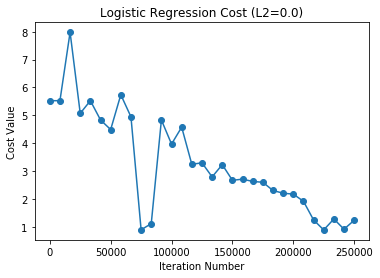

In [8]:
plot_cost(model, printed_values=30)

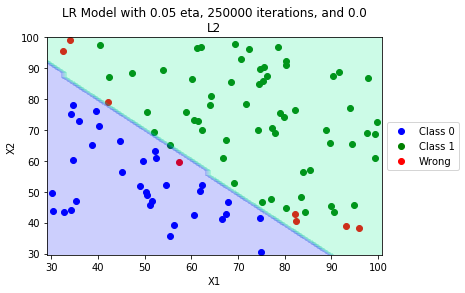

In [9]:
plot_decision_boundary(model, X, y)

a2) Logistic Regression Gradient Descent: eta=0.05, n_iter=250,000, L2=0.5


In [12]:
model = Logistic_Regression_L2(l2=0.5, n_iter=250000,eta=0.05)
model.fit(X, y)
predictions = model.predict(X)
print("a2) Accuracy: {:.0f}%".format(sum(predictions.flatten() == y)/len(y)*100))

a2) Accuracy: 60%


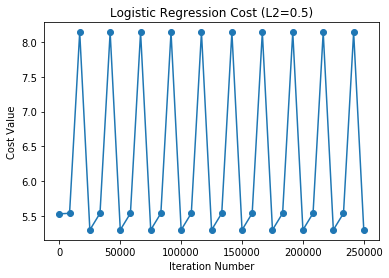

In [13]:
plot_cost(model, printed_values=30)

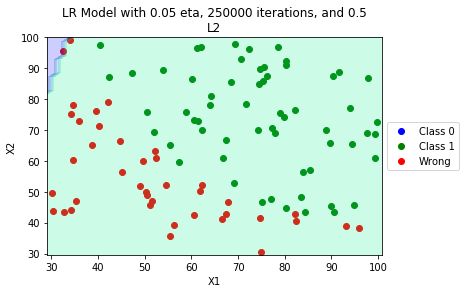

In [14]:
plot_decision_boundary(model, X, y)

a3) Logistic Regression Gradient Descent: eta=0.05, n_iter=250,000, L2=1


In [15]:
model = Logistic_Regression_L2(l2=1, n_iter=250000,eta=0.05)
model.fit(X, y)
predictions = model.predict(X)
print("a3) Accuracy: {:.0f}%".format(sum(predictions.flatten() == y)/len(y)*100))

a3) Accuracy: 62%


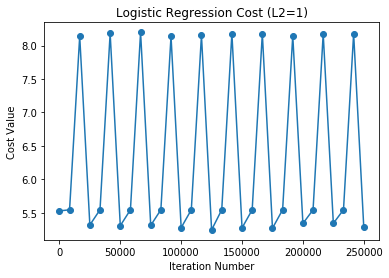

In [16]:
plot_cost(model, printed_values=30)

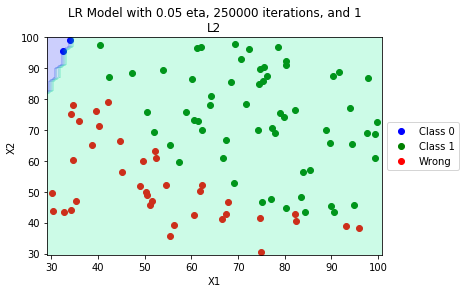

In [17]:
plot_decision_boundary(model, X, y)

**Part b)**

b1) Logistic Regression Stochastic Gradient Descent: eta=0.05, n_iter=5,000, L2=0.0, batch_size=1


In [18]:
model = Logistic_Regression_L2_SGD(l2=0, n_iter=5000,eta=0.05, batch_size=1)
model.fit(X, y)
predictions = model.predict(X)
print("b1) Accuracy: {:.0f}%".format(sum(predictions.flatten() == y)/len(y)*100))

b1) Accuracy: 79%


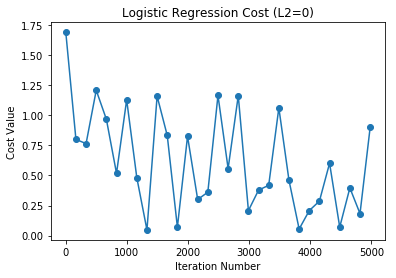

In [19]:
plot_cost(model, printed_values=30, is_sgd=True)

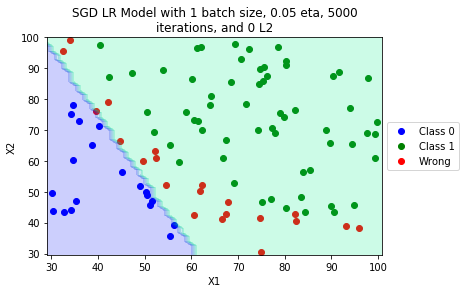

In [20]:
plot_decision_boundary(model, X, y, is_sgd=True)

b2) Logistic Regression Stochastic Gradient Descent: eta=0.05, n_iter=5,000, L2=0.5, batch_size=1


In [21]:
model = Logistic_Regression_L2_SGD(l2=0.5, n_iter=5000,eta=0.05, batch_size=1)
model.fit(X, y)
predictions = model.predict(X)
print("b2) Accuracy: {:.0f}%".format(sum(predictions.flatten() == y)/len(y)*100))

b2) Accuracy: 40%


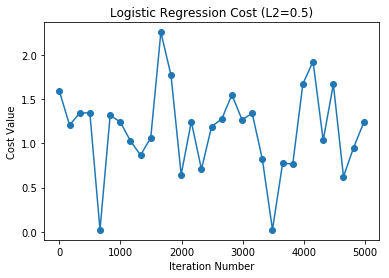

In [22]:
plot_cost(model, printed_values=30, is_sgd=True)

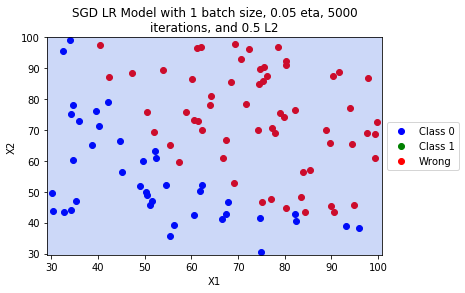

In [23]:
plot_decision_boundary(model, X, y, is_sgd=True)

b3) Logistic Regression Stochastic Gradient Descent: eta=0.05, n_iter=5,000, L2=1, batch_size=1


In [24]:
model = Logistic_Regression_L2_SGD(l2=1, n_iter=5000,eta=0.05, batch_size=1)
model.fit(X, y)
predictions = model.predict(X)
print("b3) Accuracy: {:.0f}%".format(sum(predictions.flatten() == y)/len(y)*100))

b3) Accuracy: 60%


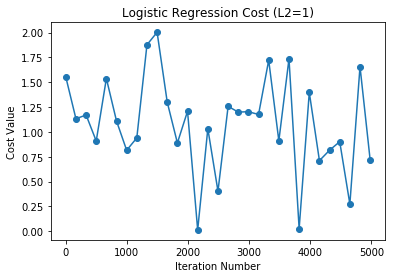

In [25]:
plot_cost(model, printed_values=30, is_sgd=True)

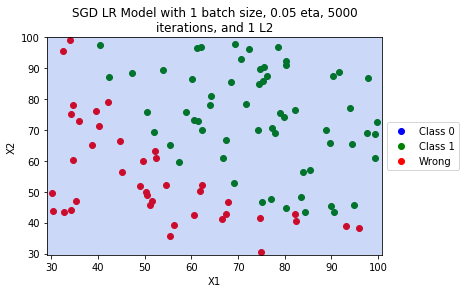

In [26]:
plot_decision_boundary(model, X, y, is_sgd=True)